In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
print(df.head())
print(df.shape)

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

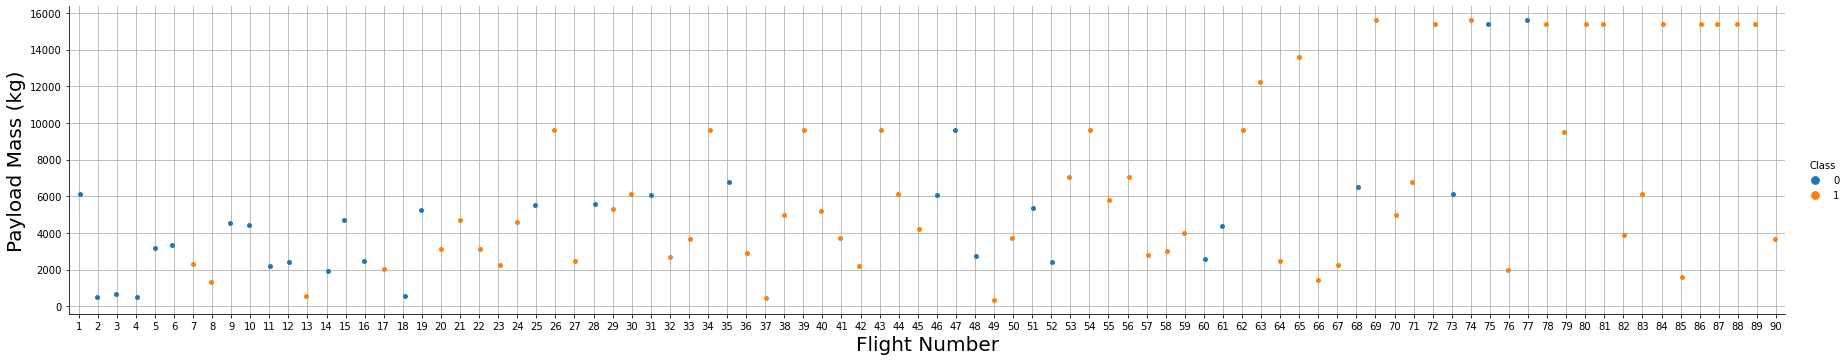

In [102]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Payload Mass (kg)",fontsize=20)
plt.grid()
plt.show()

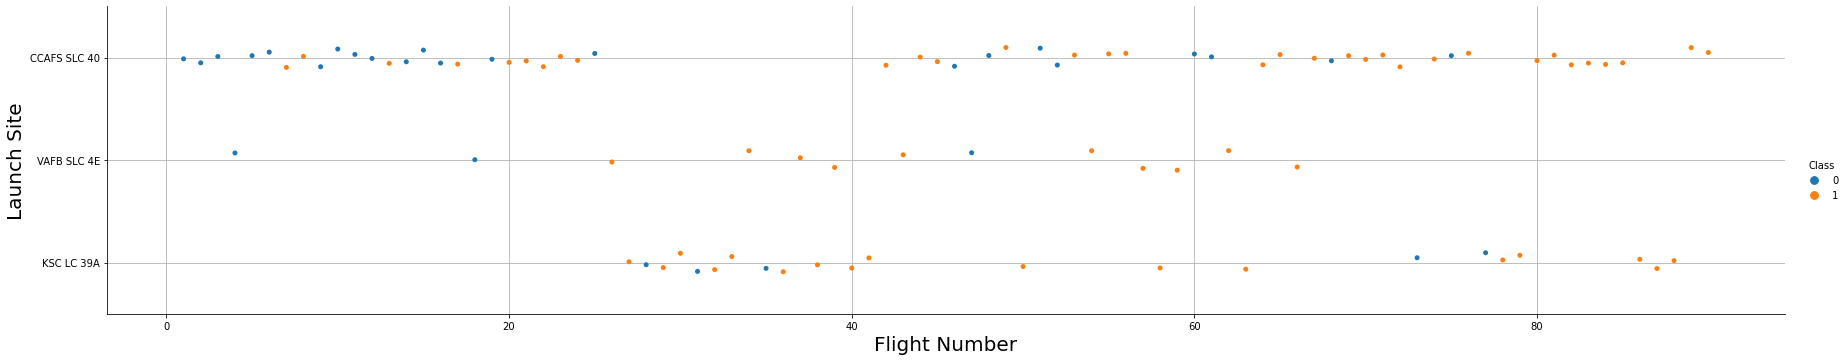

In [103]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.grid()
plt.show()

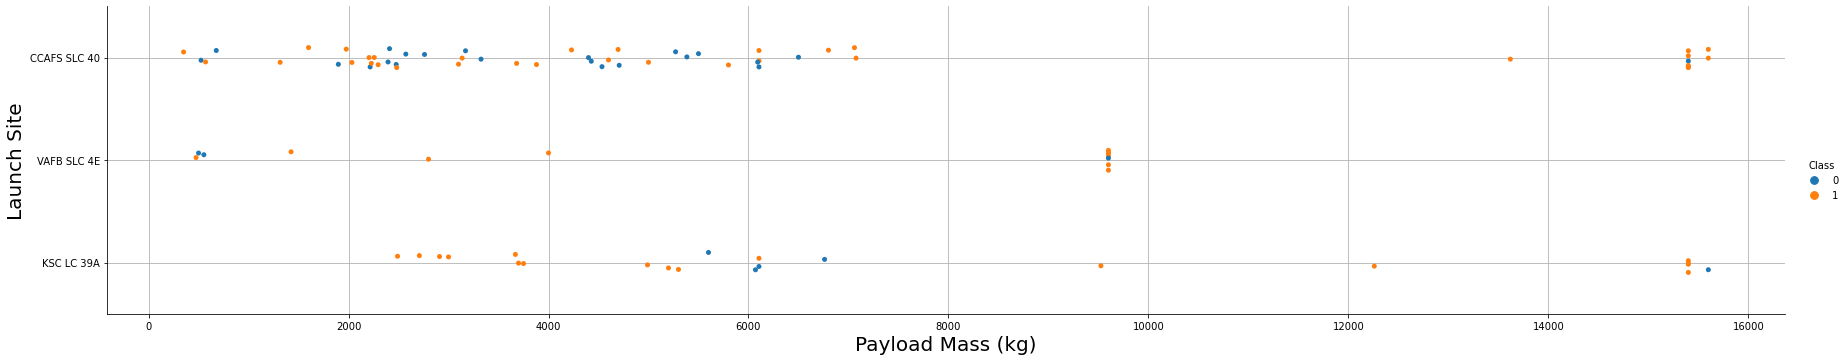

In [104]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.grid()
plt.show()

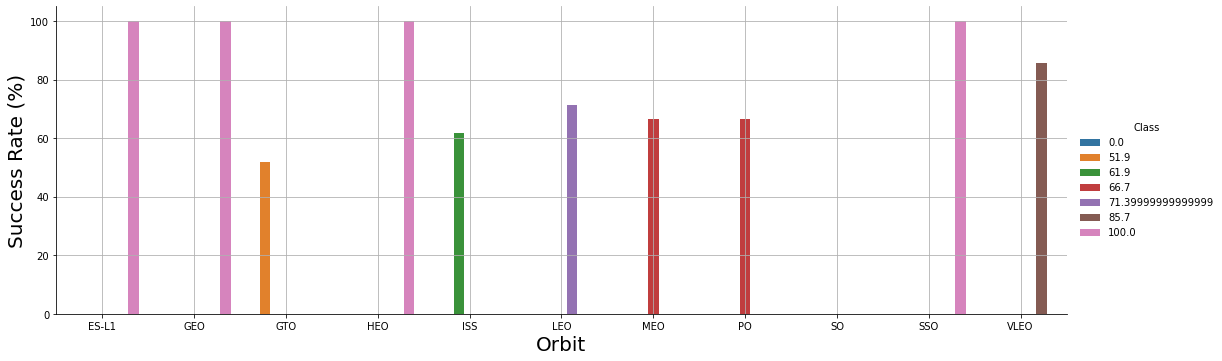

In [105]:
orbit_success = df.groupby('Orbit').mean().round(3)*100
orbit_success.reset_index(inplace=True)
sns.catplot(x="Orbit",y="Class",data=orbit_success,hue='Class', kind='bar', aspect=3)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success Rate (%)",fontsize=20)
plt.grid()
plt.show()

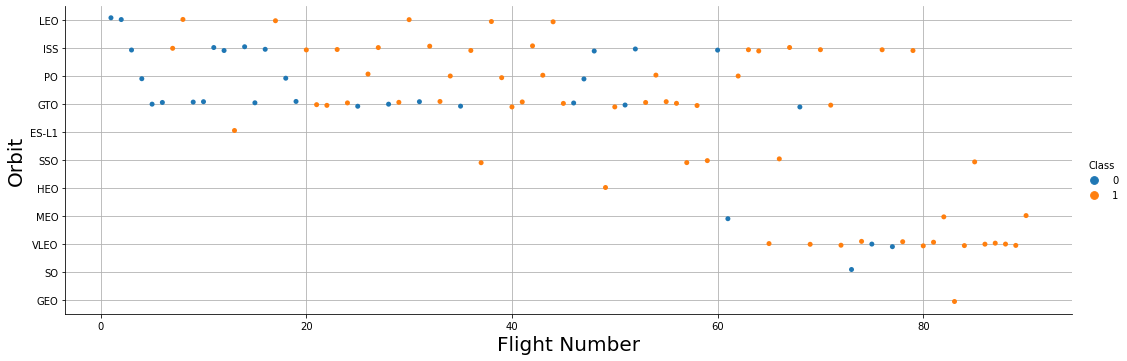

In [106]:
sns.catplot(x="FlightNumber",y="Orbit",data=df,hue='Class', aspect=3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.grid()
plt.show()

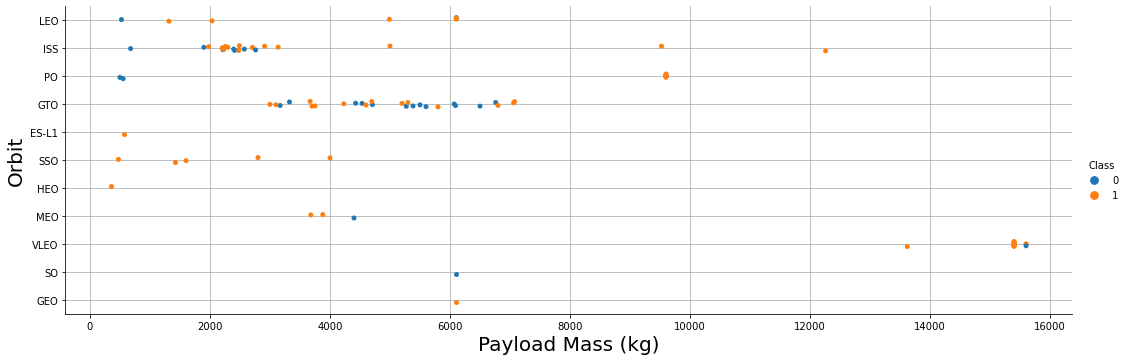

In [107]:
sns.catplot(x="PayloadMass",y="Orbit",data=df,hue='Class', aspect=3)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.grid()
plt.show()

In [108]:
# A function to Extract years from the date 
def extract_year():
    year=[]
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    
years = extract_year()
df["Year"]=years
average_by_year = df.groupby(by="Year").mean()*100
average_by_year.reset_index(inplace=True)

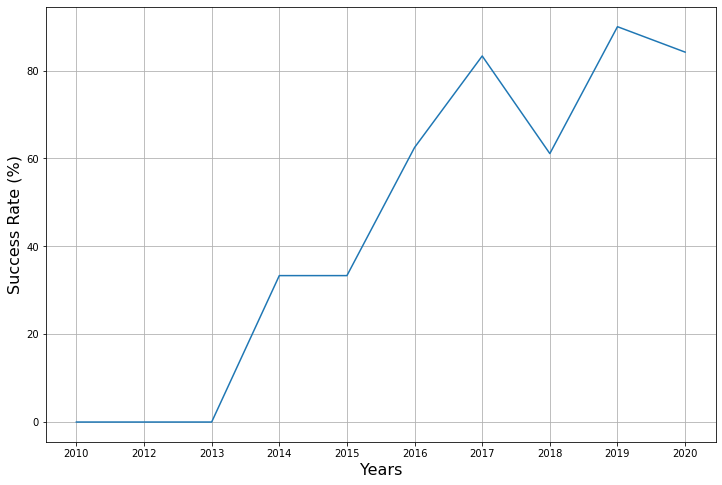

In [109]:
x = average_by_year["Year"]
y = average_by_year["Class"]
plt.figure(figsize=(12,8))
plt.xlabel('Years', {'size':16})
plt.ylabel('Success Rate (%)', {'size':16})
plt.grid()
plt.plot(x,y)

In [110]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   LandingPad    64 non-null     object 
 9   Block         90 non-null     float64
 10  ReusedCount   90 non-null     int64  
 11  Serial        90 non-null     object 
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


In [111]:
features.head(10)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004
5,6,3325.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1005
6,7,2296.000000,ISS,CCAFS SLC 40,1,False,False,True,NaN,1.0,0,B1006
7,8,1316.000000,LEO,CCAFS SLC 40,1,False,False,True,NaN,1.0,0,B1007
8,9,4535.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1008
9,10,4428.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1011


In [112]:
features_dummy = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'])

In [113]:
features = features_dummy.astype('float64')

In [114]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         